# Jinteki.net Game Log Analysis

Import useful packages

In [1]:
import Pkg; 
Pkg.add("StatsPlots"); 
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta");
Pkg.add("StatsBase");

using StatsBase;
using CSV;
using DataFrames;
using DataFramesMeta;
using StatsPlots;

    Updating registry at `/opt/julia/registries/General`
   Resolving package versions...
   Installed IntelOpenMP_jll ────────────── v2018.0.3+2
   Installed KernelDensity ──────────────── v0.6.3
   Installed StatsPlots ─────────────────── v0.14.20
   Installed Distances ──────────────────── v0.10.3
   Installed Xorg_libXrandr_jll ─────────── v1.5.2+4
   Installed HTTP ───────────────────────── v0.9.8
   Installed StaticArrays ───────────────── v1.1.2
   Installed DataValues ─────────────────── v0.4.13
   Installed MKL_jll ────────────────────── v2021.1.1+1
   Installed LZO_jll ────────────────────── v2.10.0+3
   Installed FFMPEG ─────────────────────── v0.4.0
   Installed Xorg_libXau_jll ────────────── v1.0.9+4
   Installed XML2_jll ───────────────────── v2.9.11+0
   Installed JpegTurbo_jll ──────────────── v2.0.1+3
   Installed Measures ───────────────────── v0.3.1
   Installed GLFW_jll ───────────────────── v3.3.4+0
   Installed Wayland_jll ────────────────── v1.17.0+4
   Installed

## Load the data

In [2]:
df = DataFrame(CSV.File("20210507_games.csv"))

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210507,2,missing,casual,standard,missing,missing,Asa Group: Security Through Vigilance
2,20210507,2,missing,casual,standard,missing,missing,Haas-Bioroid: Engineering the Future
3,20210507,2,missing,casual,standard,missing,missing,Argus Security: Protection Guaranteed
4,20210507,0,0,casual,standard,missing,missing,Haas-Bioroid: Engineering the Future
5,20210507,2,missing,casual,standard,missing,missing,Sportsmetal: Go Big or Go Home
6,20210507,4,missing,casual,standard,missing,missing,Earth Station: SEA Headquarters
7,20210507,5,missing,casual,standard,missing,missing,Weyland Consortium: Built to Last
8,20210507,5,missing,casual,standard,missing,missing,Weyland Consortium: Built to Last
9,20210507,0,0,casual,standard,runner,Decked,missing


In [3]:
size(df)

(84264, 9)

In [4]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,date,2.02104e7,20210301,2.02104e7,20210507
2,time,192.52,0,17.0,86439
3,turn,11.9482,0,12.0,49
4,room,,casual,,competitive
5,format,,casual,,system-gateway
6,winner,,corp,,runner
7,reason,,Agenda,,Tie
8,corp,,Acme Consulting: The Truth You Need,,Weyland Consortium: Built to Last
9,runner,,419: Amoral Scammer,,Zahya Sadeghi: Versatile Smuggler


In [5]:
last(df, 5)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210301,7,12,casual,standard,corp,Agenda,Weyland Consortium: Building a Better World
2,20210301,28,14,casual,standard,corp,Agenda,The Outfit: Family Owned and Operated
3,20210301,7,4,casual,standard,runner,Agenda,Titan Transnational: Investing In Your Future
4,20210301,31,18,casual,casual,runner,Agenda,NBN: Making News
5,20210301,14,13,casual,standard,runner,Agenda,NBN: Controlling the Message


In [6]:
missing_corp = length(findall(x -> ismissing(x), df.corp))

521

In [7]:
missing_runner = length(findall(x -> ismissing(x), df.runner))

972

In [8]:
no_winner = length(findall(x -> ismissing(x), df.winner))

4412

In [9]:
complete = df[completecases(df), :]
disallowmissing!(complete)
size(complete)

(79276, 9)

# Game Length

In [10]:
describe(complete.turn)

Summary Stats:
Length:         79276
Missing Count:  0
Mean:           12.412041
Minimum:        0.000000
1st Quartile:   9.000000
Median:         12.000000
3rd Quartile:   16.000000
Maximum:        49.000000
Type:           Int64


In [11]:
zero_turns = length(findall(x -> x === 0, complete.turn))

496

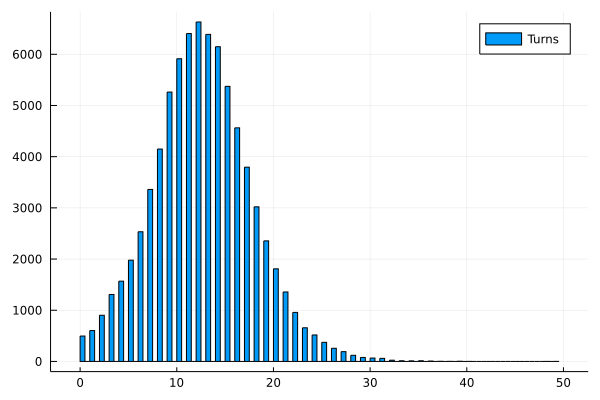

In [12]:
histogram(complete.turn, label="Turns")

In [13]:
describe(complete.time)

Summary Stats:
Length:         79276
Missing Count:  0
Mean:           21.990628
Minimum:        0.000000
1st Quartile:   11.000000
Median:         18.000000
3rd Quartile:   28.000000
Maximum:        275.000000
Type:           Int64


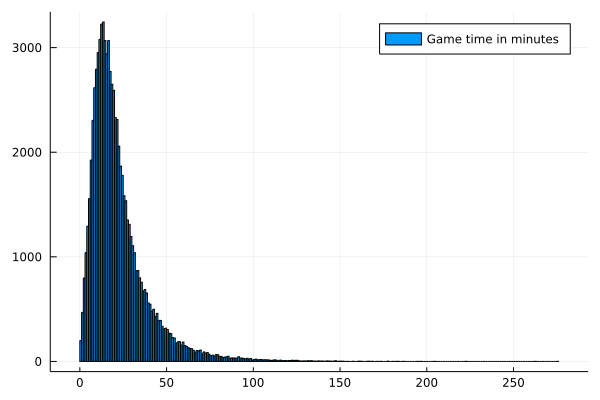

In [14]:
histogram(complete.time, label="Game time in minutes")

In [15]:
with_time_no_max = @where(complete, :time .<= 120, :time .>= 2, :turn .!= 0)
describe(with_time_no_max.time)

Summary Stats:
Length:         78343
Missing Count:  0
Mean:           21.930319
Minimum:        2.000000
1st Quartile:   11.000000
Median:         18.000000
3rd Quartile:   28.000000
Maximum:        120.000000
Type:           Int64


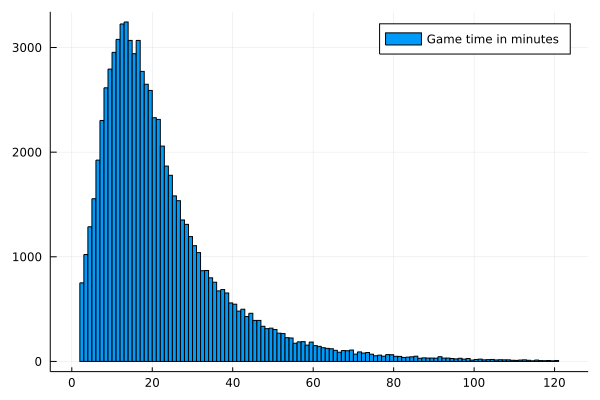

In [16]:
histogram(with_time_no_max.time, label="Game time in minutes")

# Game Outcomes

In [17]:
t0_concede = @where(complete, :turn .== 0, :reason .== "Concede")
size(t0_concede)

(493, 9)

In [18]:
t1_concede = @where(complete, :turn .== 1, :reason == "Concede")

,date,time,turn,room,format,winner,reason,corp,runner
,Int64,Int64,Int64,String,String,String,String,String,String


In [19]:
t0_runner_concede = @where(t0_concede, :winner .== "corp")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210507,2,0,competitive,standard,corp,Concede,NBN: Controlling the Message
2,20210506,1,0,casual,standard,corp,Concede,Jinteki: Restoring Humanity
3,20210506,1,0,casual,standard,corp,Concede,Argus Security: Protection Guaranteed
4,20210505,0,0,casual,standard,corp,Concede,Haas-Bioroid: Precision Design
5,20210505,0,0,casual,startup,corp,Concede,NBN: Reality Plus
6,20210505,0,0,casual,startup,corp,Concede,Jinteki: Personal Evolution
7,20210504,0,0,casual,startup,corp,Concede,Jinteki: Personal Evolution
8,20210504,0,0,casual,standard,corp,Concede,Weyland Consortium: Built to Last
9,20210504,1,0,casual,standard,corp,Concede,Haas-Bioroid: Precision Design


In [20]:
rc = countmap(t0_runner_concede.corp)
reverse(sort(collect(rc), by=x->x[2]))

38-element Vector{Pair{String, Int64}}:
        "The Syndicate: Profit over Principle" => 35
              "Haas-Bioroid: Precision Design" => 25
                 "Jinteki: Personal Evolution" => 24
                "NBN: Controlling the Message" => 21
           "Weyland Consortium: Built to Last" => 13
                           "NBN: Reality Plus" => 12
                 "Jinteki: Restoring Humanity" => 10
             "Jinteki: Replicating Perfection" => 9
            "Near-Earth Hub: Broadcast Center" => 8
      "Weyland Consortium: Builder of Nations" => 8
             "Earth Station: SEA Headquarters" => 7
              "Spark Agency: Worldswide Reach" => 7
 "Weyland Consortium: Building a Better World" => 6
                                               ⋮
    "Saraswati Mnemonics: Endless Exploration" => 2
                "SYNC: Everything, Everywhere" => 1
                      "GRNDL: Power Unleashed" => 1
               "Blue Sun: Powering the Future" => 1
         "Acme Consu

In [21]:
t0_corp_concede = @where(t0_concede, :winner .== "runner")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210507,0,0,casual,startup,runner,Concede,Jinteki: Restoring Humanity
2,20210507,0,0,casual,standard,runner,Concede,Haas-Bioroid: Precision Design
3,20210506,1,0,casual,system-gateway,runner,Concede,NBN: Reality Plus
4,20210506,1,0,casual,standard,runner,Concede,Pālanā Foods: Sustainable Growth
5,20210506,0,0,casual,standard,runner,Concede,Pālanā Foods: Sustainable Growth
6,20210506,1,0,competitive,standard,runner,Concede,Weyland Consortium: Built to Last
7,20210506,0,0,casual,standard,runner,Concede,NBN: Controlling the Message
8,20210506,0,0,casual,standard,runner,Concede,The Syndicate: Profit over Principle
9,20210504,0,0,casual,standard,runner,Concede,NBN: Reality Plus


In [22]:
cc = countmap(t0_corp_concede.runner)
reverse(sort(collect(cc), by=x->x[2]))

38-element Vector{Pair{String, Int64}}:
          "The Catalyst: Convention Breaker" => 30
         "Zahya Sadeghi: Versatile Smuggler" => 24
                       "419: Amoral Scammer" => 20
        "Tāo Salonga: Telepresence Magician" => 18
      "René \"Loup\" Arcemont: Party Animal" => 17
               "Reina Roja: Freedom Fighter" => 14
         "Hoshiko Shiro: Untold Protagonist" => 12
           "Steve Cambridge: Master Grifter" => 8
           "Leela Patel: Trained Pragmatist" => 8
  "Ken \"Express\" Tenma: Disappeared Clone" => 7
 "Ele \"Smoke\" Scovak: Cynosure of the Net" => 7
    "Valencia Estevez: The Angel of Cayambe" => 7
         "Sunny Lebeau: Security Specialist" => 7
                                             ⋮
          "Az McCaffrey: Mechanical Prodigy" => 3
             "Edward Kim: Humanity's Hammer" => 2
              "Noise: Hacker Extraordinaire" => 2
    "Kate \"Mac\" McCaffrey: Digital Tinker" => 2
                       "Null: Whistleblower" => 1
      

In [23]:
countmap(complete.winner)

Dict{String, Int64} with 2 entries:
  "runner" => 34162
  "corp"   => 45114

In [24]:
countmap(complete.reason)

Dict{String, Int64} with 4 entries:
  "Flatline" => 12164
  "Decked"   => 292
  "Concede"  => 14725
  "Agenda"   => 52095

In [25]:
no_concedes = @where(complete, :reason .!= "Concede")
size(no_concedes)

(64551, 9)

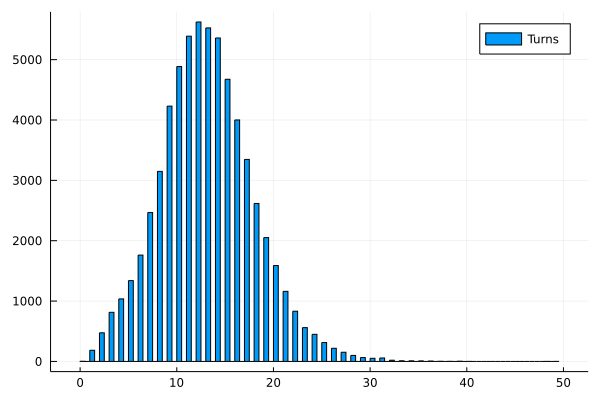

In [26]:
histogram(no_concedes.turn, label="Turns")

In [27]:
describe(no_concedes.turn)

Summary Stats:
Length:         64551
Missing Count:  0
Mean:           12.877151
Minimum:        0.000000
1st Quartile:   10.000000
Median:         13.000000
3rd Quartile:   16.000000
Maximum:        49.000000
Type:           Int64


In [28]:
long_game = @where(complete, :turn .=== 49)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210314,72,49,casual,standard,corp,Agenda,Haas-Bioroid: Architects of Tomorrow


In [29]:
long_game[:, [:turn, :winner, :reason, :corp, :runner]]

,turn,winner,reason,corp,runner
,Int64,String,String,String,String
1,49,corp,Agenda,Haas-Bioroid: Architects of Tomorrow,"Ken ""Express"" Tenma: Disappeared Clone"


In [30]:
concedes = @where(complete, :reason .== "Concede")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210507,12,11,casual,standard,runner,Concede,"SYNC: Everything, Everywhere"
2,20210507,4,7,casual,standard,runner,Concede,The Outfit: Family Owned and Operated
3,20210507,0,0,casual,startup,runner,Concede,Jinteki: Restoring Humanity
4,20210507,9,12,casual,standard,runner,Concede,GameNET: Where Dreams are Real
5,20210507,41,11,casual,standard,runner,Concede,Asa Group: Security Through Vigilance
6,20210507,2,2,casual,standard,runner,Concede,NBN: Controlling the Message
7,20210507,11,9,casual,standard,runner,Concede,Sportsmetal: Go Big or Go Home
8,20210507,11,6,casual,standard,runner,Concede,Haas-Bioroid: Precision Design
9,20210507,10,13,casual,standard,runner,Concede,Earth Station: SEA Headquarters


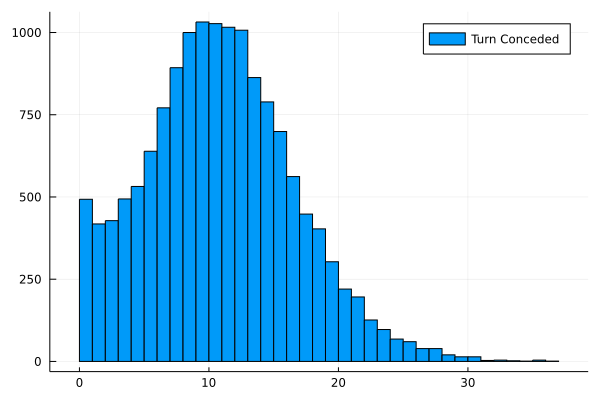

In [31]:
histogram(concedes.turn, label="Turn Conceded")

In [32]:
format_count = countmap(complete.format)

Dict{String, Int64} with 9 entries:
  "system-gateway"  => 3761
  "classic"         => 66
  "startup"         => 12554
  "casual"          => 5369
  "standard"        => 56546
  "snapshot-plus"   => 44
  "core-experience" => 455
  "eternal"         => 463
  "snapshot"        => 18